In [44]:
import overpy
op = overpy.Overpass()
import geopandas as gp
import pandas as pd
from shapely.geometry import shape, Polygon,LineString, MultiPolygon
from shapely.ops import polygonize

In [80]:

bb = "(33.85972509642107,35.46144957007879,33.91857725200028,35.572185442725925)"
osm_data = op.query(f"""
[timeout:25];
(
  way["highway"="motorway"]{bb};
  way["highway"="trunk"]{bb};
  way["highway"="primary"]{bb};
  way["highway"="secondary"]{bb};
  way["highway"="tertiary"]{bb};
  way["highway"="residential"]{bb};
  way["highway"="unclassified"]{bb};
  // way[building]{bb};
  relation["admin_level"="7"]{bb};
);
(._;>;);
out body;
""")

osm_data

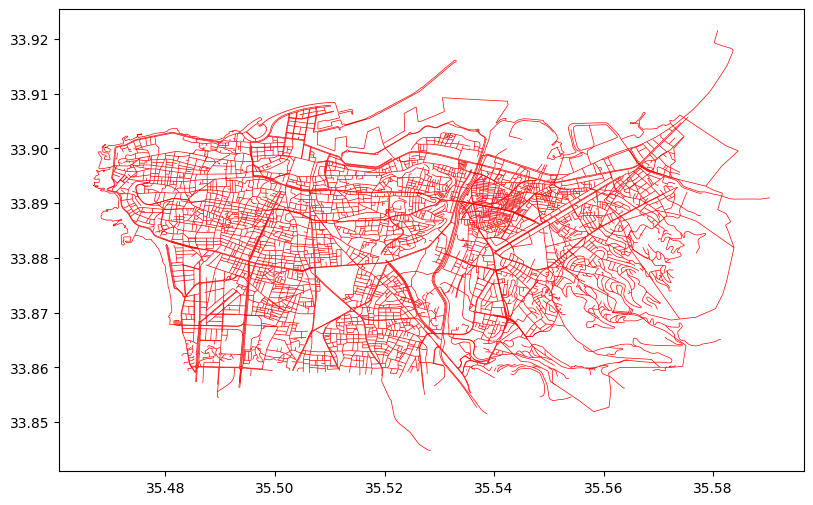

In [82]:

osm_data.ways

def nodes_to_polygon(nodes):
	points = [(n.lon, n.lat) for n in nodes]
	# return Polygon(points)
	return LineString(points)
	# return points

streets_dict = [{
    'id': el.id,
    'geometry': nodes_to_polygon(el.nodes),
} for el in osm_data.ways]

streets = gp.GeoDataFrame(results_dict)
ax = streets.plot(figsize=(12,6), color='red', edgecolor='black', lw=.5)